<a href="https://colab.research.google.com/github/tahira4/Project1-File-Processing-System/blob/main/Fire_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/forestfireClassification.csv'


In [ ]:
import os

# Check the contents of your Google Drive after mounting
os.listdir('/content/drive/MyDrive/Colab Notebooks/')


['forestfireClassification.csv', 'Fire_detection.ipynb']

In [ ]:
file_path = '/content/drive/MyDrive/ColabNotebooks'  # Ensure no extra spaces or typos


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/forestfireClassification.csv'


In [ ]:
import os

# List the contents of the 'Colab Notebooks' folder
os.listdir('/content/drive/MyDrive/Colab Notebooks')


['forestfireClassification.csv', 'Fire_detection.ipynb']

In [ ]:
# Check if the file exists at the specified path
os.path.exists(file_path)



True

In [ ]:
import pandas as pd
df = pd.read_csv(file_path)


1. Inspect the Data
Check the first few rows, data types, and summary statistics of the dataset to get an initial understanding.

In [ ]:
df.head() # Inspect the first few rows of the dataset

# Check data types and non-null counts
print(df.info())

# Summary statistics for numerical columns
print(df.describe())


   Unnamed: 0  day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  \
0           0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6   
1           1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6   
2           2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1   
3           3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9   
4           4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2   

   ISI  BUI  FWI   Classes  Region  
0  1.3  3.4  0.5  not fire       1  
1  1.0  3.9  0.4  not fire       1  
2  0.3  2.7  0.1  not fire       1  
3  0.0  1.7  0.0  not fire       1  
4  1.2  3.9  0.5  not fire       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   243 non-null    int64  
 1   day          243 non-null    int64  
 2   month        243 non-null

2. Handle Missing Data
If there are any missing values, you need to decide how to handle them (e.g., imputation, removal).

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Option 1: Remove rows with missing data
df = df.dropna()

# Option 2: Fill missing values with a specific value (e.g., mean, median)
# df['Temperature'] = df['Temperature'].fillna(df['Temperature'].mean())


Unnamed: 0     0
day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64


3. Feature Engineering
Depending on the analysis you plan to perform, you might need to create new features (e.g., combine multiple columns into one, create new risk indices, etc.).

In [ ]:
# Example: Create a 'Fire Risk' feature based on multiple columns (you can adjust based on your needs)
df['Fire_Risk'] = df['Temperature'] * df['FFMC'] * df['FWI']


4. Data Visualization
Visualize the data to identify patterns, correlations, and outliers. You can use libraries like matplotlib, seaborn, or plotly.

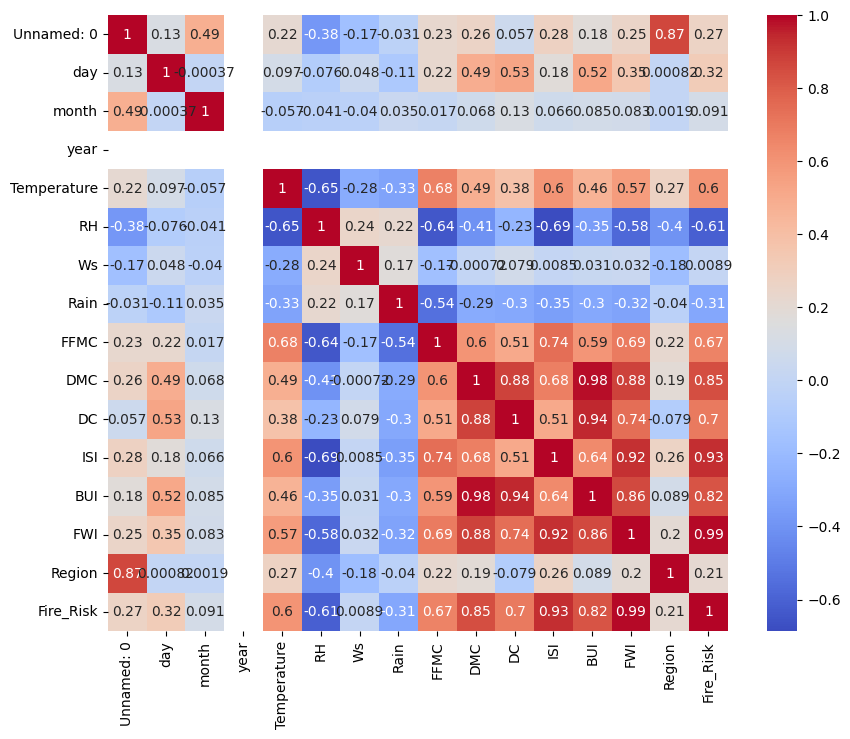

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()


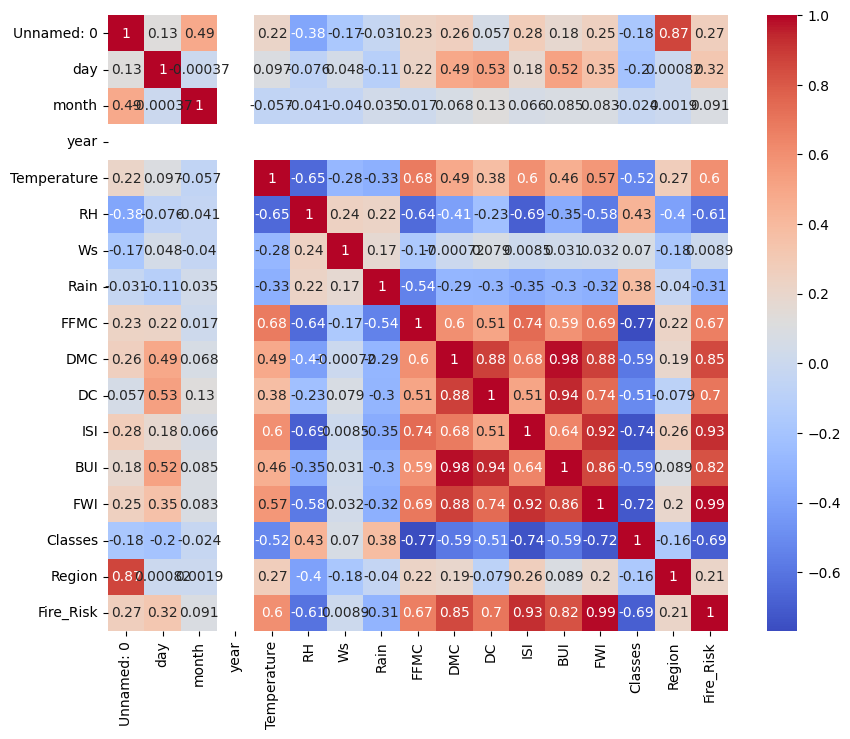

In [ ]:
# Convert Categorical Data to Numeric (if needed)
from sklearn.preprocessing import LabelEncoder

# Encode the 'Classes' column
label_encoder = LabelEncoder()
df['Classes'] = label_encoder.fit_transform(df['Classes'])

# Now, you can include 'Classes' in the correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [ ]:
# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns
print(f"Non-numeric columns: {non_numeric_columns}")


Non-numeric columns: Index(['Date'], dtype='object')


5. Prepare for Analysis or Modeling
Depending on your goals (e.g., prediction, detection), you may need to:

Normalize or scale features if needed for modeling.
Split the data into training and testing sets (if building models).

In [ ]:
from sklearn.model_selection import train_test_split

# Example: Split the data into training and testing sets
X = df[['Temperature', 'FFMC', 'FWI', 'Rain']]  # Features
y = df['Classes']  # Target (Fire risk class or other)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


6. Explore Time-based Analysis (if relevant)

In [ ]:
df['Date'] = pd.to_datetime(df[['year', 'month', 'day']])


#1. Real-time Alert System (Detection and Monitoring)

To create an alert system based on conditions conducive to wildfires, you'll need to develop thresholds or models to predict high-risk conditions.

Define Thresholds for Alerts: Based on domain knowledge or experimentation, set thresholds for key variables like Temperature, RH, FWI, etc., which trigger alerts for potential wildfires.


In [ ]:
# Example: Set a threshold for Fire Weather Index (FWI) to trigger an alert
high_fire_risk = df[df['FWI'] > 40]  # Adjust the threshold based on analysis

# Example: Alerts based on multiple factors
alerts = df[(df['Temperature'] > 30) & (df['RH'] < 30) & (df['FWI'] > 50)]
print(alerts[['Date', 'Temperature', 'RH', 'FWI']])


Empty DataFrame
Columns: [Date, Temperature, RH, FWI]
Index: []


Simulate Real-Time Alerts (Optional): If you're simulating real-time data, use a loop or scheduler to periodically check the latest data.

In [ ]:
import time

# Simulate real-time alert checking
while True:
    # Load new data (simulate real-time update)
    new_data = pd.read_csv(file_path)

    # Check for alerts
    alerts = new_data[(new_data['Temperature'] > 30) & (new_data['RH'] < 30) & (new_data['FWI'] > 50)]
    if not alerts.empty:
        print("Fire Alert! Critical conditions detected.")
        print(alerts[['Date', 'Temperature', 'RH', 'FWI']])

    # Wait for the next time interval (e.g., 10 minutes)
    time.sleep(600)


KeyboardInterrupt: 

2.  Resource Allocation System
For resource allocation, you'll need to predict wildfire intensity or spread and then optimize the allocation of resources (e.g., fire trucks, helicopters, personnel) to areas with the highest risk.

Intensity Prediction: Use your data to predict intensity or spread. This could be a classification problem (e.g., predicting "low," "medium," "high" risk) or regression (predicting a continuous value like spread rate).

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Use historical data to train a classifier (e.g., predict fire risk)
X = df[['Temperature', 'RH', 'FWI', 'FFMC']]  # Features
y = df['Classes']  # Target (fire class: low, medium, high)

model = RandomForestClassifier()
model.fit(X, y)

# Predict risk class for a new set of conditions
new_conditions = [[35, 20, 60, 80]]  # Example values
prediction = model.predict(new_conditions)
print("Predicted fire risk:", prediction)


Resource Allocation Optimization: Based on the intensity prediction, allocate resources by prioritizing areas with the highest predicted risk. You can implement this using a priority queue or a scheduling algorithm

In [ ]:
import heapq

# Example: Prioritize areas with the highest predicted risk
risk_scores = df[['Region', 'FWI']]
prioritized_regions = heapq.nlargest(5, risk_scores.values, key=lambda x: x[1])  # Top 5 regions with highest FWI
print(prioritized_regions)


3. Evacuation Planning

For evacuation planning, you can determine the safest and most efficient routes based on the location of the fire and nearby regions. Consider using graph theory (e.g., shortest path algorithms) or optimization techniques.

Evacuation Route Calculation: If you have geographic data (e.g., latitude, longitude, region boundaries), you can model evacuation routes using graph-based algorithms like Dijkstra's algorithm or A*.
# New Section

In [ ]:
# Example: Use Dijkstra’s algorithm to find the shortest path between regions (if you have geographic data)
import networkx as nx

# Construct a graph (regions as nodes, distances as edges)
G = nx.Graph()
G.add_edge('A', 'B', weight=5)  # Example: Add edge between regions A and B with weight 5 (distance)
G.add_edge('B', 'C', weight=3)
G.add_edge('C', 'D', weight=2)

# Find the shortest path from 'A' to 'D'
shortest_path = nx.shortest_path(G, source='A', target='D', weight='weight')
print("Evacuation route:", shortest_path)


Evacuation route: ['A', 'B', 'C', 'D']


4. System Simulation and Evaluation

After developing these systems, you’ll need to simulate different wildfire scenarios to evaluate your system's performance. This involves testing how well the alert system detects high-risk conditions, how efficiently resources are allocated, and how optimal your evacuation planning is under different conditions.

Simulate Wildfire Scenarios: Create hypothetical scenarios where conditions change (e.g., temperature rises, FWI increases) and assess how well the system responds.

In [ ]:
# Example: Simulate a fire outbreak with increasing temperature
df_simulated = df.copy()
df_simulated['Temperature'] += 5  # Simulate a 5-degree increase in temperature

# Check for alerts based on simulated data
simulated_alerts = df_simulated[(df_simulated['Temperature'] > 30) & (df_simulated['FWI'] > 50)]
print(simulated_alerts[['Date', 'Temperature', 'FWI']])


5. Optimization and Performance Monitoring
Ensure that your system is optimized for real-time performance. Monitor resource usage, processing time, and response time.

Optimize System Performance: If you're using real-time monitoring or multiple threads, consider using asynchronous programming, caching results, or optimizing the code for speed.

Real-time Monitoring: For systems running in real-time, implement logging and monitoring to track system performance and resource usage.